In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [83]:
data=sns.load_dataset("iris") #loading dataset 

In [84]:
data.head() #first 5 rows to have a look at the data 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [86]:
for i in range(0,len(data['species'])):
    if(data.loc[i,'species']=='setosa'):
        data.loc[i,'species']=0
    elif(data.loc[i,'species']=='versicolor'):
        data.loc[i,'species']=1
    else:
        data.loc[i,'species']=2

In [89]:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [90]:
x=data.drop(columns=["species"]) #seperating dependent and independent column 
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
y=data.species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [92]:
from sklearn.decomposition import PCA #applying pca for dimensionality reduction 
pca=decomposition.PCA(n_components=3)
pca.fit(x)
x= pca.transform(x)

In [93]:
pca_df=pd.DataFrame(x, columns=["pc1","pc2","pc3"]) #renaming columns 
pca_df.head()

,pc1,pc2,pc3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [94]:
finalDf = pd.concat([pca_df,y], axis = 1)  # final data including label and features 
finalDf.head()

,pc1,pc2,pc3,species
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


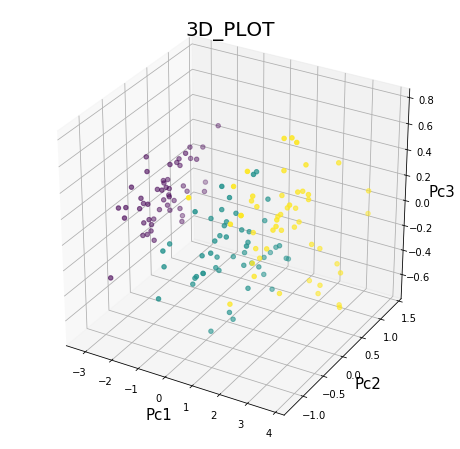

In [105]:
# plotting 3d graph 

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot( projection='3d')

ax.set_xlabel('Pc1', fontsize = 15)
ax.set_ylabel('Pc2', fontsize = 15)
ax.set_zlabel('Pc3', fontsize = 15)
ax.set_title('3D_PLOT', fontsize = 20)


ax.scatter(finalDf['pc1'],finalDf['pc2'],finalDf['pc3'],c=finalDf['species'])
